In [4]:
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Função de Runge 
def runge (X):
     return 1.0 / (1.0 + 25.0 * X ** 2)

In [6]:
'''     
Interpolação polinomial da função de Runge em k pontos uniformemente espaçados por meio da
interpolação de Lagrange
''' 
def runge_linspace_interpolate(k):
    X = np.linspace(-1.0, 1.0, k)
    Y = runge(X)

    return lagrange(X, Y)

In [7]:
# Plota a função de Runge e sua interpolação polinomial para diferentes valores de k
def plot_interpolation():

    # Seleciona 200 pontos linearmente espaçados entre -1 e 1
    plot_x = np.linspace(-1.0, 1.0, 200)

    fig = plt.figure(constrained_layout=True)
    axis = fig.subplots(2, 2)
    count = 0

    for i in range(2):
        for j in range(2):

            k = 10 + 5 * count
            # Interpola a função de runge para k pontos
            poly = runge_linspace_interpolate(k)

            # Plota o gráfico do polinômio interpolador nos 200 pontos selecionados
            axis[i,j].plot(plot_x, poly(plot_x))
            # Plota o gráfico da função de Runge nos 200 pontos selecionados
            axis[i,j].plot(plot_x, runge(plot_x))
            
            axis[i,j].set_title(f"k = {k}")

            count += 1

    plt.show()

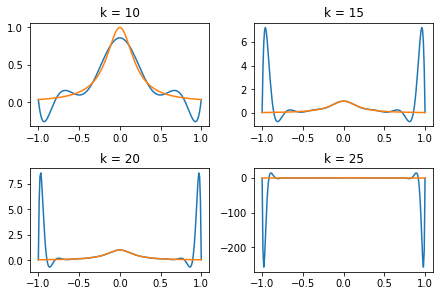

In [8]:
plot_interpolation()

In [9]:
# Plota o maior erro absoluto da interpolação em função de k com pontos linearmente espaçados
def plot_linspace_error():
    plot_x = np.linspace(-1.0, 1.0, 200)
    fig = plt.figure(constrained_layout=True)

    err_val = []
    k = np.arange(1, 40)

    # Busca o maior erro absoluto para valores de k entre 1 e 40
    for n in k:
        poly = runge_linspace_interpolate(n)
        err = lambda x : abs(runge(x) - poly(x))
        err_val.append(np.amax(err(plot_x)))

    plt.plot(k, err_val)
    plt.xlabel('k')
    plt.ylabel('e_k')
    
    plt.show()

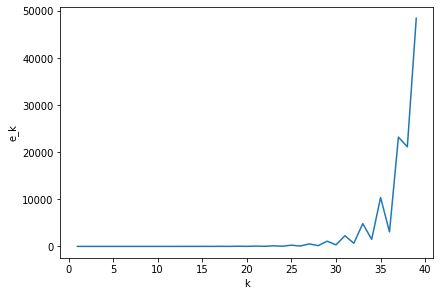

In [10]:
plot_linspace_error()

In [11]:
# Geração dos nós de Chebyshev
def chebyshev (n):
    return np.cos(np.pi * (2 * np.arange(n) + 1) / (2 * n))

In [12]:
# Interpolação polinomial da função de Runge em k nós de Chebyshev por meio da interpolação de Lagrange
def runge_cheb_interpolate(k):
    X = chebyshev(k)
    Y = runge(X)

    return lagrange(X, Y)

In [13]:
# Plota o maior erro absoluto da interpolação em função de k com os nós de Chebyshev 
def plot_cheb_error():
    aux_x = np.linspace(-1.0, 1.0, 200)
    fig = plt.figure(constrained_layout=True)
    
    err_val = []
    k = np.arange(1, 40)
    
    # Busca o maior erro absoluto para valores de k entre 1 e 40
    for n in k:
        poly = runge_cheb_interpolate(n)
        err = lambda x : abs(runge(x) - poly(x))
        err_val.append(np.amax(err(aux_x)))
    
    plt.plot(k, err_val)
    plt.xlabel('k')
    plt.ylabel('e_k')
    
    plt.show()

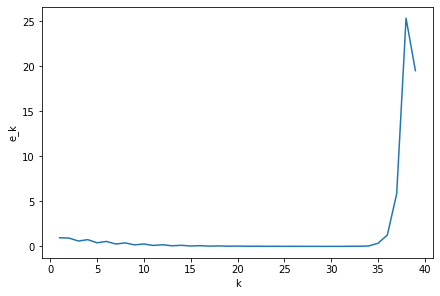

In [14]:
plot_cheb_error()